In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import shap
import joblib

In [2]:
# Load male and female models
model_male = joblib.load("../models/model_male.pkl")
model_female = joblib.load("../models/model_female.pkl")

In [3]:
# Load gender-specific datasets
df_male = pd.read_csv("../data/participant_summary_male.csv")
df_female = pd.read_csv("../data/participant_summary_female.csv")

In [4]:
X_male = df_male.drop(columns=["Participant_ID", "Gender", "Mean_Accuracy", "Mean_ResponseTime"])
y_male = df_male["Mean_Accuracy"]

X_female = df_female.drop(columns=["Participant_ID", "Gender", "Mean_Accuracy", "Mean_ResponseTime"])
y_female = df_female["Mean_Accuracy"]

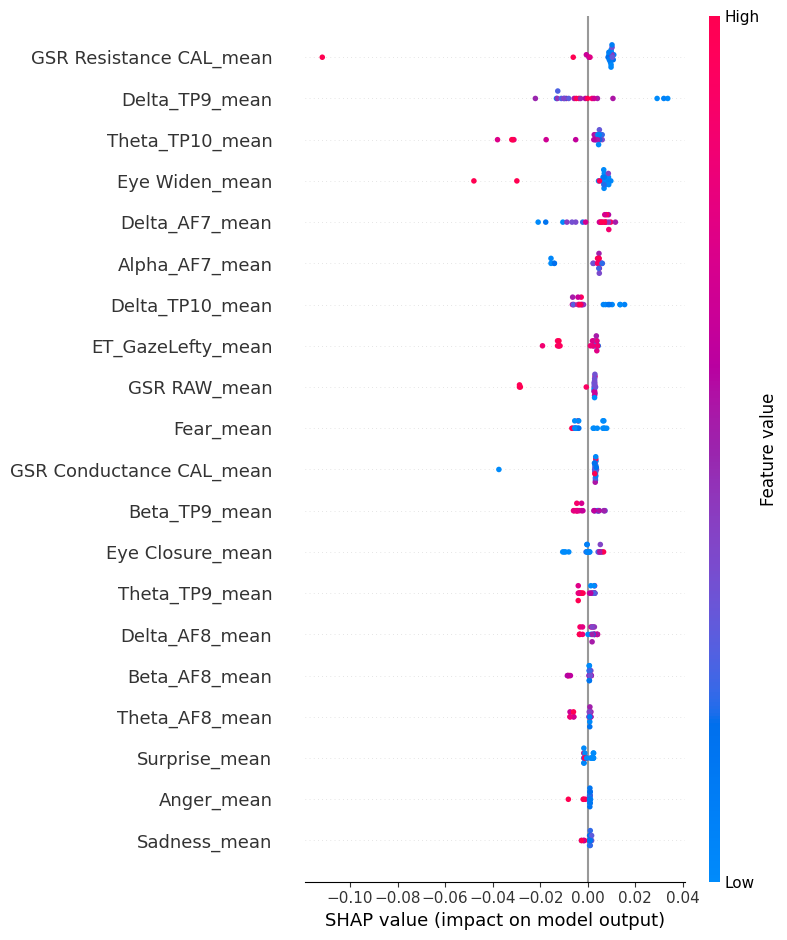

In [5]:
explainer_male = shap.TreeExplainer(model_male)
shap_values_male = explainer_male.shap_values(X_male)

shap.summary_plot(shap_values_male, X_male, feature_names=X_male.columns, show=False)

pd.DataFrame(shap_values_male, columns=X_male.columns).to_csv(
    "../notebooks/data/shap_values_male.csv", index=False
)
plt.savefig("../notebooks/data/shap_summary_male.png")

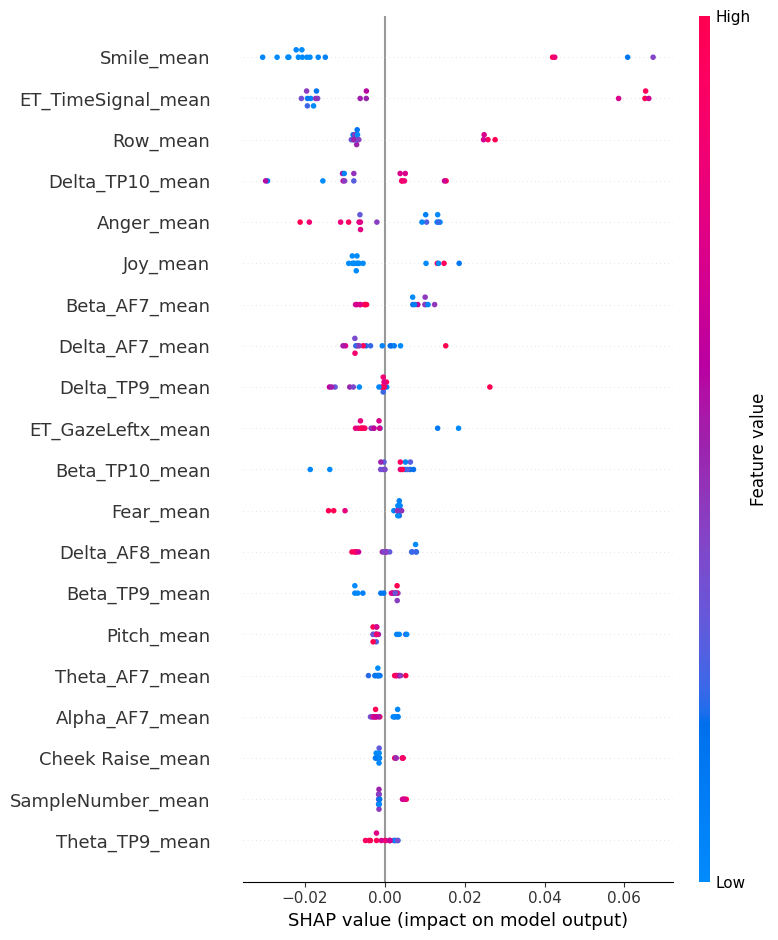

In [6]:
explainer_female = shap.TreeExplainer(model_female)
shap_values_female = explainer_female.shap_values(X_female)

shap.summary_plot(shap_values_female, X_female, feature_names=X_female.columns, show=False)

pd.DataFrame(shap_values_female, columns=X_female.columns).to_csv(
    "../notebooks/data/shap_values_female.csv", index=False
)
plt.savefig("../notebooks/data/shap_summary_female.png")